In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt

In [ ]:
data = pd.read_csv('Dataset.csv')

In [ ]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Task-1: Restaurant Ratings

## Analyze the distribution of aggregate ratings and determine the most common rating range.

In [ ]:
agg_ratings = data['Aggregate rating']
counts_ratings = agg_ratings.value_counts().sort_index()

In [ ]:
common_ratings_range = counts_ratings.idxmax()
print("Most common ratings range :", common_ratings_range)

Most common ratings range : 0.0


## Calculate the average number of votes received by restaurants.

In [ ]:
avg_votes = data['Votes'].mean()
print("Average number of votes received by restaurants", avg_votes)

Average number of votes received by restaurants 156.909747670401


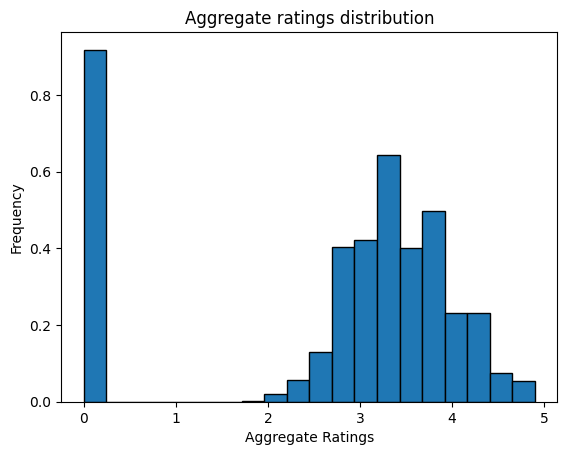

In [ ]:
mt.hist(agg_ratings, bins = 20, edgecolor = 'black', density = 'True')
mt.xlabel("Aggregate Ratings")
mt.ylabel("Frequency")
mt.title("Aggregate ratings distribution")
mt.show()

## Task 2: Cusinie Combination
## Identify the most common combinations of cuisines in the dataset.

In [ ]:
cus = data['Cuisines']
agg_ratings = data['Aggregate rating']

In [ ]:
count_cusinine_combination = cus.value_counts()

In [ ]:
common_cusinine_combination = count_cusinine_combination.head(5)
print("Most common combinations of cuisines", common_cusinine_combination)


Most common combinations of cuisines North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64


In [ ]:
cus_comb_avg_rating = data.groupby('Cuisines')['Aggregate rating'].mean()


## Determine if certain cuisine combinations tend to have higher ratings.

In [ ]:
top_5_avg_ratings = cus_comb_avg_rating.nlargest(5)
print("\n Average Ratings for the top 5 combinations", top_5_avg_ratings)


 Average Ratings for the top 5 combinations Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
Name: Aggregate rating, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
import folium

In [ ]:
data = pd.read_csv('Dataset.csv')

In [ ]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Task-3: Geographic Analysis
## Plot the locations of restaurants on a map using longitude and latitude coordinates.
## Identify any patterns or clusters of restaurants in specific areas.

In [ ]:
from IPython.display import display
from sklearn.cluster import KMeans

In [ ]:
Res_name = data['Restaurant Name']
lat = data['Latitude']
lon = data['Longitude']

In [ ]:
df = data[['Latitude','Longitude']]
num_clusters = 5

In [ ]:
kmeans = KMeans(n_clusters= num_clusters, n_init='auto', random_state = 42)
data['Cluster'] = kmeans.fit_predict(df)

In [ ]:
map_center = [lat.mean(), lon.mean()]
res_map = folium.Map(location = map_center, zoom_starts = 12)

In [ ]:
cluster_color = ['red', 'blue', 'green', 'purple','orange']

In [ ]:
for index, row in data.iterrows():
  rest_name = row['Restaurant Name']
  lat = row['Latitude']
  lon = row['Longitude']
  cuisines = row['Cuisines']
  rating = row['Aggregate rating']
  cluster = row['Cluster']

In [ ]:
popup_text = f"restaurant: {rest_name}\n cuisines:{cuisines}|nRatings:{rating}"

In [ ]:
marker = folium.Marker([lat, lon], popup= popup_text)

In [ ]:
marker.add_to(res_map)

In [ ]:
display(res_map)

## Task4: Restaurant Chains
## Identify if there are any restaurant chains present in the dataset.
## Analyze the ratings and popularity of different restaurant chains.

In [15]:
import pandas as pd
import matplotlib.pyplot as mt
import numpy as np

In [16]:
data = pd.read_csv("Dataset.csv")

In [17]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [18]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [19]:
res_chains = data.groupby('Restaurant Name').size().reset_index(name ='Chain counts' )
res_chains = res_chains[res_chains['Chain counts'] > 1]

In [20]:
res_chains = res_chains.sort_values(by= 'Chain counts', ascending= False)

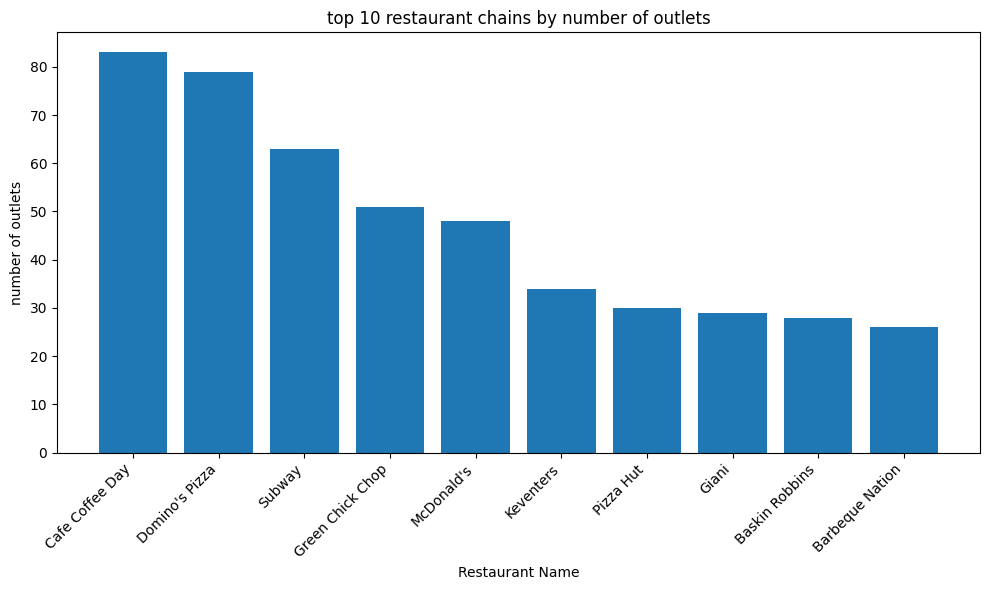

In [21]:
mt.figure(figsize= (10,6))
mt.bar(res_chains['Restaurant Name'][:10], res_chains['Chain counts'][:10])
mt.xticks(rotation= 45, ha='right')
mt.xlabel('Restaurant Name')
mt.ylabel("number of outlets")
mt.title("top 10 restaurant chains by number of outlets")
mt.tight_layout()

In [22]:
chain_ratings = data.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index(name = 'Average Ratings')
chain_votes = data.groupby('Restaurant Name')['Votes'].sum().reset_index(name = 'Total votes')

In [23]:
chain_analysis = pd.merge(chain_ratings, chain_votes, on = 'Restaurant Name' )

In [24]:
chain_analysis = chain_analysis.sort_values(by= 'Average Ratings', ascending = False)

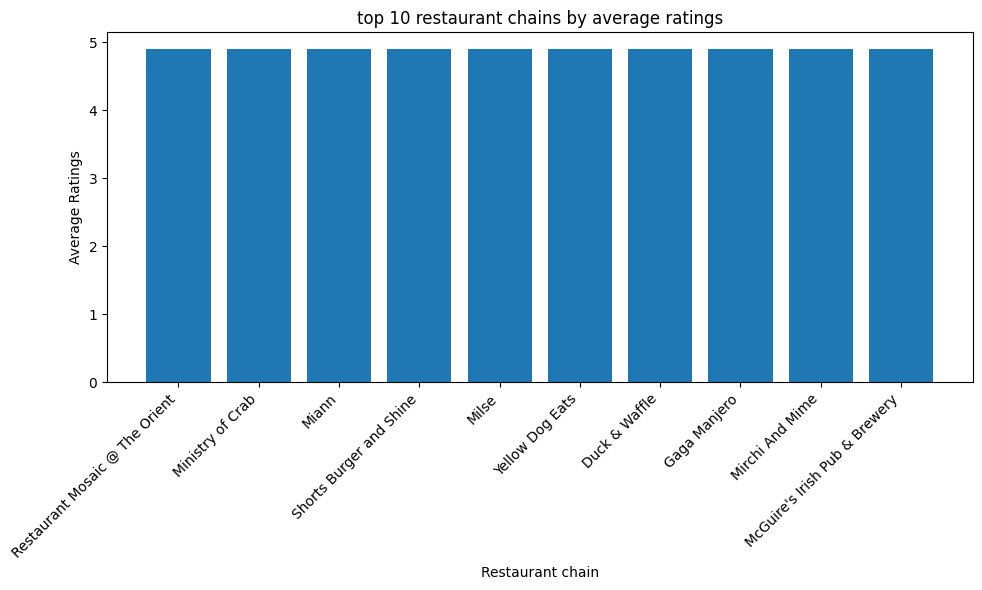

In [25]:
mt.figure(figsize = (10,6))
mt.bar(chain_analysis['Restaurant Name'][:10], chain_analysis['Average Ratings'][:10])
mt.xticks(rotation= 45, ha='right')
mt.xlabel('Restaurant chain')
mt.ylabel("Average Ratings")
mt.title("top 10 restaurant chains by average ratings")
mt.tight_layout()
mt.show()